In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/Users/changtianxing/Desktop/py As2/Data/final_aggregated_data.csv")
#please change the path into your computer's path
df.head()

,ACCIDENT_NO,TIME_OF_DAY_CODE,SEVERITY,ACCIDENT_TYPE_1,ACCIDENT_TYPE_2,ACCIDENT_TYPE_3,ACCIDENT_TYPE_4,ACCIDENT_TYPE_5,ACCIDENT_TYPE_6,ACCIDENT_TYPE_7,...,SEX_M,SEX_U,ROAD_USER_TYPE_DESC_Drivers,ROAD_USER_TYPE_DESC_E-scooter Rider,ROAD_USER_TYPE_DESC_Motorcyclists,ROAD_USER_TYPE_DESC_Not Known,ROAD_USER_TYPE_DESC_Passengers,ROAD_USER_TYPE_DESC_Pedestrians,ROAD_USER_TYPE_DESC_Pillion Passengers,HELMET_BELT_WORN_risk
0,T20120000009,4,3,0,0,0,1,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,T20120000012,4,2,1,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,T20120000013,4,2,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,T20120000021,1,3,0,0,0,1,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,T20120000028,4,2,0,0,0,1,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df['VEHICLE_YEAR_BIN'] = pd.cut(
    df['VEHICLE_YEAR_MANUF_h'], 
    bins=[1950,1970,1980,2000, 2010,2020,2030], 
    labels=False, 
    include_lowest=True
)

df['VEHICLE_WEIGHT_BIN'] = pd.qcut(
    df['VEHICLE_WEIGHT_h'], 
    q=5, 
    labels=False, 
    duplicates='drop' 
)


target = "SEVERITY"
#Avoid reverse causality in choosing faetures
feature_cols = [
    'TIME_OF_DAY_CODE',
    
    # Accident type (multi-class one-hot)
    'ACCIDENT_TYPE_1', 'ACCIDENT_TYPE_2', 'ACCIDENT_TYPE_3', 'ACCIDENT_TYPE_4',
    'ACCIDENT_TYPE_5', 'ACCIDENT_TYPE_6', 'ACCIDENT_TYPE_7', 'ACCIDENT_TYPE_8', 'ACCIDENT_TYPE_9',
    
    # Direction of crash (DCA categories)
    'DCA_Cross Traffic', 'DCA_Head-on', 'DCA_Off Road Curve', 'DCA_Off Road Straight',
    'DCA_Other', 'DCA_Overtaking', 'DCA_Parking', 'DCA_Pedestrian', 'DCA_Same Direction', 'DCA_Side Objects',
    
    # Lighting condition (one-hot)
    'LIGHT_CONDITION_1', 'LIGHT_CONDITION_2', 'LIGHT_CONDITION_3',
    'LIGHT_CONDITION_4', 'LIGHT_CONDITION_5', 'LIGHT_CONDITION_6', 'LIGHT_CONDITION_9',
    
    # Road geometry
    'ROAD_GEOMETRY_1', 'ROAD_GEOMETRY_2', 'ROAD_GEOMETRY_3', 'ROAD_GEOMETRY_4',
    'ROAD_GEOMETRY_5', 'ROAD_GEOMETRY_6', 'ROAD_GEOMETRY_7', 'ROAD_GEOMETRY_8', 'ROAD_GEOMETRY_9',
    
    # Speed zone
    'SPEED_ZONE_High Speed Zone', 'SPEED_ZONE_Low Speed Zone',
    'SPEED_ZONE_Medium Speed Zone', 'SPEED_ZONE_Unknown Zone',
    
    # Road surface type
    'ROAD_SURFACE_TYPE_h_1', 'ROAD_SURFACE_TYPE_h_2', 'ROAD_SURFACE_TYPE_h_3',
    
    # Fuel type
    'FUEL_TYPE_E', 'FUEL_TYPE_G', 'FUEL_TYPE_M', 'FUEL_TYPE_O', 'FUEL_TYPE_P', 'FUEL_TYPE_S', 'FUEL_TYPE_Z',
    
    # Vehicle info (discretized)
    'VEHICLE_YEAR_BIN', 'VEHICLE_WEIGHT_BIN',
    
    # Vehicle status
    'IS_OVERLOADED_h', 'INTENT_MATCH_h',
    
    # Initial point of impact
    'INITIAL_IMPACT_h_2', 'INITIAL_IMPACT_h_3', 'INITIAL_IMPACT_h_4', 'INITIAL_IMPACT_h_5',
    
    # Person-related features
    'AGE_GROUP', 'SEX_M', 'SEX_U',
    
    # Road user roles 
    'ROAD_USER_TYPE_DESC_Drivers',
    'ROAD_USER_TYPE_DESC_Motorcyclists',
    'ROAD_USER_TYPE_DESC_Passengers',
    'ROAD_USER_TYPE_DESC_Pedestrians',
    'ROAD_USER_TYPE_DESC_Pillion Passengers',
    'ROAD_USER_TYPE_DESC_Not Known',
    'ROAD_USER_TYPE_DESC_E-scooter Rider',
    
    # Helmet/belt usage risk indicator
    'HELMET_BELT_WORN_risk'
]

                              Feature  MI Score
18                 DCA_Same Direction  0.014386
1                     ACCIDENT_TYPE_1  0.010942
55                 INITIAL_IMPACT_h_3  0.010108
36         SPEED_ZONE_High Speed Zone  0.007938
4                     ACCIDENT_TYPE_4  0.007153
13              DCA_Off Road Straight  0.004906
58                          AGE_GROUP  0.004475
39            SPEED_ZONE_Unknown Zone  0.004240
62  ROAD_USER_TYPE_DESC_Motorcyclists  0.003886
64    ROAD_USER_TYPE_DESC_Pedestrians  0.003552
26                  LIGHT_CONDITION_9  0.003482
2                     ACCIDENT_TYPE_2  0.003419
17                     DCA_Pedestrian  0.003373
24                  LIGHT_CONDITION_5  0.003245
53                     INTENT_MATCH_h  0.002877
68              HELMET_BELT_WORN_risk  0.002783
0                    TIME_OF_DAY_CODE  0.002640
31                    ROAD_GEOMETRY_5  0.002237
47                        FUEL_TYPE_P  0.001971
51                 VEHICLE_WEIGHT_BIN  0

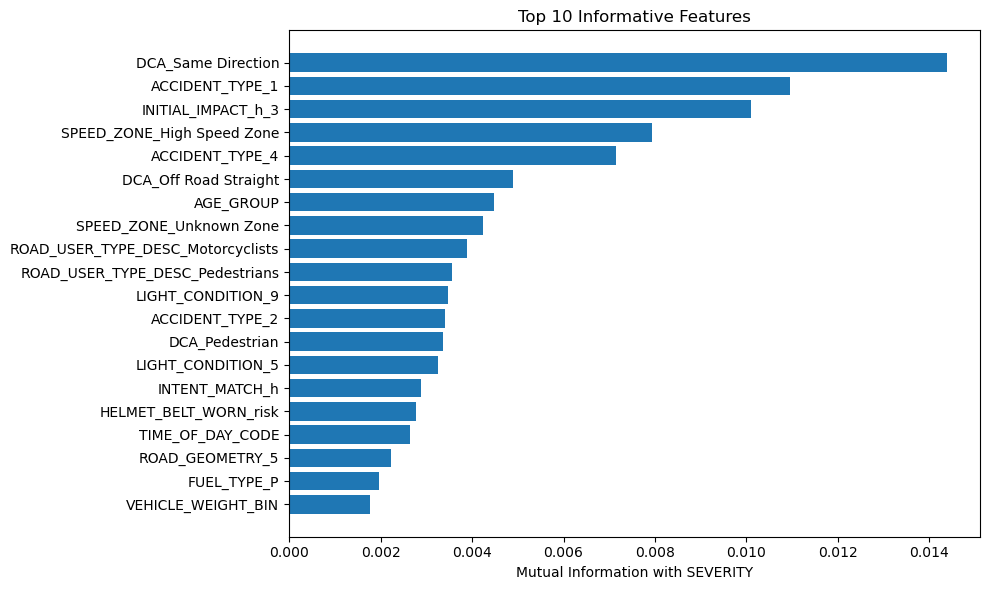

In [7]:
#For Task1
X = df[feature_cols]
y = df[target]

#Mutual Info
mi_scores = mutual_info_classif(X, y, discrete_features=True)

#calculate and print
mi_df = pd.DataFrame({
    'Feature':  X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)
print(mi_df.head(20))  

# plot
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'].head(20)[::-1], mi_df['MI Score'].head(20)[::-1])
plt.xlabel("Mutual Information with SEVERITY")
plt.title("Top 10 Informative Features")
plt.tight_layout()
plt.show()

In [8]:
#Test for data bias
print(y.value_counts(normalize=True))

#Test for null value
print(df[feature_cols].isnull().sum())

3    0.629934
2    0.353657
1    0.016390
4    0.000019
Name: SEVERITY, dtype: float64
TIME_OF_DAY_CODE                          0
ACCIDENT_TYPE_1                           0
ACCIDENT_TYPE_2                           0
ACCIDENT_TYPE_3                           0
ACCIDENT_TYPE_4                           0
                                         ..
ROAD_USER_TYPE_DESC_Pedestrians           0
ROAD_USER_TYPE_DESC_Pillion Passengers    0
ROAD_USER_TYPE_DESC_Not Known             0
ROAD_USER_TYPE_DESC_E-scooter Rider       0
HELMET_BELT_WORN_risk                     0
Length: 69, dtype: int64


In [46]:
#Testing confounding variables 
features_A = ['SPEED_ZONE_High Speed Zone']
X_A = df[features_A]
y = df['SEVERITY']

mi_A = mutualmi_A = mutual_info_classif(X_A, y, discrete_features=True)
_info_classif(X_A, y, discrete_features=True)

for f, s in zip(features_A, mi_A):
    print(f"[Without confounders] {f}: MI = {s:.4f}")

[Without confounders] SPEED_ZONE_High Speed Zone: MI = 0.0079


In [42]:
features_B = ['SPEED_ZONE_High Speed Zone', 'ACCIDENT_TYPE_4']
X_B = df[features_B]

mi_B = mutual_info_classif(X_B, y, discrete_features=True)

for f, s in zip(features_B, mi_B):
    print(f"[With confounders] {f}: MI = {s:.4f}")

[With confounders] SPEED_ZONE_High Speed Zone: MI = 0.0079
[With confounders] ACCIDENT_TYPE_4: MI = 0.0072
